In [47]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobra≈∫ sobie, ≈ºe pewnego wakacyjnego dnia, bƒôdƒÖc na pla≈ºy w pe≈Çnym s≈Ço≈Ñcu, odbierasz telefon od nieznanego numeru.
Robisz to niechƒôtnie ‚Äî zas≈Çu≈ºy≈Çe≈õ/a≈õ przecie≈º na odpoczynek i chcesz mieƒá ten czas tylko dla siebie. Ju≈º masz na ko≈Ñcu jƒôzyka wymijajƒÖcƒÖ odpowied≈∫, gdy nagle z drugiej strony s≈Çyszysz:
‚ÄûCzy jeste≈õ gotowy, by tego lata rozwik≈Çaƒá jednƒÖ z najwiƒôkszych zagadek ludzko≈õci?‚Äù

Jako osoba z natury ciekawa ≈õwiata i ze ≈õwietnym umys≈Çem analitycznym, szybko zapominasz o pla≈ºy i wakacjach. Zaintrygowany/a dopytujesz o szczeg√≥≈Çy, ale rozm√≥wca nie chce zdradziƒá zbyt wiele. Wiadomo jedynie, ≈ºe chodzi o *zatoniƒôcie Titanica w 1914* roku, a celem misji jest ustalenie, kt√≥re osoby mia≈Çy szansƒô prze≈ºyƒá.

**Ty** ‚Äî jako **renomowany analityk danych** ‚Äî by≈Çe≈õ/by≈Ça≈õ ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wƒÖtpliwo≈õci postanawiasz podjƒÖƒá siƒô zadania, majƒÖc nadziejƒô, ≈ºe twoja wiedza mo≈ºe zostaƒá praktycznie wykorzystana w s≈Çusznym celu.

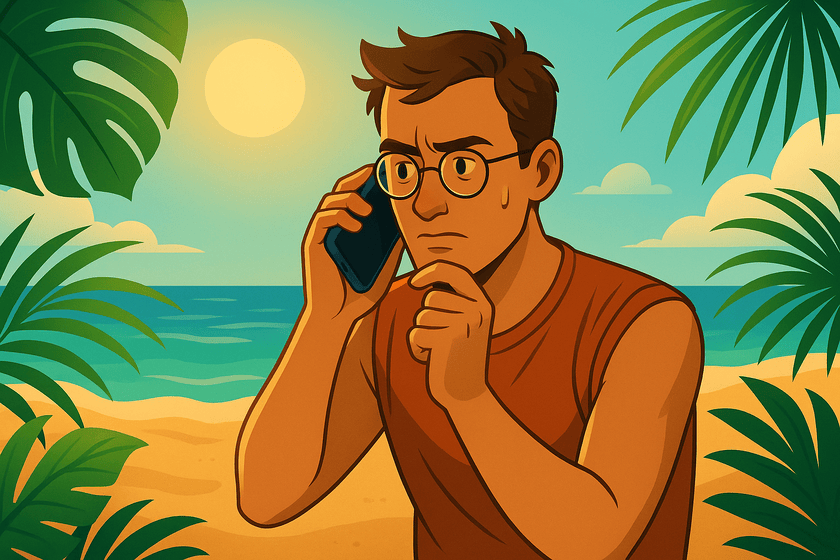

(*AI-generated image*)


#### Twoim celem bƒôdzie przeanalizowanie i przetworzenie zbioru danych w taki spos√≥b, by m√≥g≈Ç on byƒá u≈ºyty do nauki modelu do klasyfikacji ka≈ºdego pasa≈ºera Titanica jako ofiary (0) lub osoby, kt√≥ra prze≈ºy≈Ça (1).

(Uwaga: w tym zadaniu nie bƒôdziesz trenowaƒá modeli, ta przyjemno≈õƒá spotka ciƒô w nastƒôpnych notebookach)

Poni≈ºej znajdziesz pytania, kt√≥re mogƒÖ byƒá pomocne w analizie, oraz odwo≈Çania do poszczeg√≥lnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny sƒÖ istotne w kontek≈õcie zadania?üçæ‚úÖ
- Czy wystƒôpujƒÖ brakujƒÖce warto≈õci? Je≈õli tak, to jak je uzupe≈Çnisz? (sekcja #2.1)üçæ‚úÖ
- Czy typy danych sƒÖ odpowiednie do znaczenia kolumny? (sekcja #1.3)üçæ‚úÖ
- Czy dystrybucje danych majƒÖ rozk≈Çady normalne, czy asymetryczne? (sekcja #4.1 + wyk≈Çad)üçæ‚úÖ
- Kt√≥ra zmienna oznacza predykowanƒÖ klasƒô?üçæ‚úÖ
- Jaki jest rozk≈Çad zmiennej predykowanej wzglƒôdem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)üçæ‚úÖ
- Czy ko≈Ñcowe rozk≈Çady zawierajƒÖ warto≈õci skrajne? (sekcja #4.2 + wyk≈Çad)üçæ‚úÖ

Wymagania:

- Zbi√≥r musi byƒá oczyszczony, tj. finalnie nie powinien mieƒá brakujƒÖcych warto≈õci (sekcja #2.1)üçæ‚úÖ
- Zbi√≥r musi zawieraƒá co najmniej dwie dodatkowe kolumny, kt√≥re mogƒÖ wzbogaciƒá informacje zawarte w zbiorze (sekcje #1.5 i #2.2)üçæ‚úÖ
- Cechy kategorialne powinny byƒá zakodowane, postaraj siƒô dobraƒá odpowiedni spos√≥b (sekcja #2.3)üçæ‚úÖ
- Zbadaj, czy wystƒôpujƒÖ skrajne warto≈õci (outliery) zar√≥wno dla warto≈õci numerycznych, jak i dla kategorialnychüçæ‚úÖ
- Ka≈ºda cecha powinna byƒá zwizualizowana co najmniej raz. Sam(a) zastan√≥w siƒô, czy warto wizualizowaƒá cechy parami w celu odkrycia zale≈ºno≈õci miƒôdzy nimi (sekcja #4.4)üçæ‚úÖ
- Nie ma ograniczenia na liczbƒô kom√≥rek, ale zastan√≥w siƒô, czy dana wizualizacja/obliczenie jest przydatne w ca≈Çej analizie, czy po prostu sobie "egzystuje" bez ≈ºadnych wniosk√≥wüçæ‚úÖ

Zadbaj o czytelno≈õƒá kodu i nazewnictwo zmiennych. Je≈õli jaki≈õ wycinek kodu siƒô powtarza, to wyodrƒôbnij go do funkcji. Postaraj siƒô zamieszczaƒá swoje wnioski w postaci komentarza `Markdown`.

Poni≈ºej zamieszczamy tabelƒô z wyja≈õnieniem poszczeg√≥lnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasa≈ºer prze≈ºy≈Ç (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podr√≥≈ºy (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imiƒô i nazwisko pasa≈ºera.                                                       |
| **Sex**      | P≈Çeƒá pasa≈ºera (male = mƒô≈ºczyzna, female = kobieta).                             |
| **Age**      | Wiek pasa≈ºera w latach.                                                         |
| **SibSp**    | Liczba rodze≈Ñstwa i ma≈Ç≈ºonk√≥w na pok≈Çadzie.                                     |
| **Parch**    | Liczba rodzic√≥w i dzieci na pok≈Çadzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasa≈ºera                                     |
| **Embarked** | Port, w kt√≥rym pasa≈ºer wsiad≈Ç (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [48]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

# W≈Ça≈õciwa czƒô≈õƒá zadania

Zadanie zacznƒô od zapoznania siƒô z danymi - przyk≈Çadowe rekordy, statystyki danych, wystƒôpowanie warto≈õci brakujƒÖcych, a tak≈ºe typy danych. Ze wzglƒôdu na istnienie oryginalnych danych w pliku zewnƒôtrznym pozwoli≈Çam sobie pracowaƒá na poczƒÖtkowo podanej zmiennej *titanic_df*.

(Aby podejmowaƒá decyzje o zostawianiu kolumn, podstawianiu pod NaN itd. tworzy≈Çam wykresy jako komentarz i r√≥wnie≈º tam je opisywa≈Çam. Poniewa≈º dopiero p√≥≈∫niej doczyta≈Çam o konieczno≈õci wykres√≥w dla ka≈ºdej cechy pozwolƒô zostawiƒá sobie tych kilka wykres√≥w w komentarzach i dla czytelno≈õci nie kopiowaƒá ich do ostatniego paragrafu. Sorrki za k≈Çopot)

## Przygotowanie danych

In [49]:
### Og√≥lne info:

#titanic_df.head()
#titanic_df.describe()
#titanic_df.describe(include='all')
#titanic_df.info()

In [50]:
### ≈Åadne wykresiki
import matplotlib.pyplot as plt
import seaborn as sns

def nice_percentage_plot(df, group, count):
    smol = df[[group, count]]
    per = 100 * smol.groupby(group)[count].sum() / smol.groupby(group)[count].size()
    plt.bar(per.index, per.values, color='steelblue', edgecolor='black')
    plt.title(f'Percentage distribution of positive flag of variable {count} by {group}')
    plt.xlabel(f'{group}')
    plt.ylabel('Percentage')

def nice_hist(df, gram):
    plt.hist(df[gram])
    plt.title(f'Histogram of {gram}')
    plt.xlabel("Value")
    plt.ylabel("Frequency")


def nice_box (df, of):
    sns.boxplot(data = df[of], color = 'skyblue')
    plt.title(f"Distribution of {of} (boxplot)")
    plt.ylabel("Value")

def nice_scatter(df, xpoint, ypoint, type):
    if type == 'dd':
        alp = 0.1
    elif type == 'cd':
        alp = 0.4
    else:
        alp = 0.6
    sns.scatterplot(data = df, x = xpoint, y = ypoint, color='darkorange', alpha = alp)
    plt.title(f'{xpoint} vs {ypoint}')
    plt.xlabel(f'{xpoint}')
    plt.ylabel(f'{ypoint}')

In [51]:
'''
nice_percentage_plot(titanic_df, 'Embarked', 'Survived')
plt.show() #<- nie ma wiƒôkszych r√≥≈ºnic w prze≈ºywalno≈õci w zale≈ºno≈õci od portu, w kt√≥rym rozpoczƒôto podr√≥≈º, wiƒôc nie jest to istotna informacja w analizie
'''

"\nnice_percentage_plot(titanic_df, 'Embarked', 'Survived')\nplt.show() #<- nie ma wiƒôkszych r√≥≈ºnic w prze≈ºywalno≈õci w zale≈ºno≈õci od portu, w kt√≥rym rozpoczƒôto podr√≥≈º, wiƒôc nie jest to istotna informacja w analizie\n"

In [52]:
titanic_df = titanic_df.drop(columns = ['Name', 'Ticket', 'Embarked'])

Na samym starcie zacznƒô od usuniƒôcia kolumny *Name* z finalnego zbioru danych, gdy≈º szanse na ucieczkƒô z tonƒÖcego statku nie zale≈ºƒÖ od imienia i nazwiska(mogƒÖ zale≈ºeƒá po≈õrednio, np. z nazwiskiem bogatego rodu mogƒÖ siƒô wiƒÖzaƒá pieniƒÖdze na wykupienie miejsc bli≈ºej stref ewakuacji - jednak wtedy bezpo≈õrednim czynnikiem bƒôdzie numer kabiny, a nie nazwisko). Podobna sytuacja ma siƒô dla kolumny *Ticket*, wiƒôc ona r√≥wnie≈º zostanie pominiƒôta w dalszych analizach. Po rozwa≈ºeniu, czy dla cechy *Embarked* istniejƒÖ jakie≈õ trendy wiƒÖ≈ºƒÖce jƒÖ z predykowanƒÖ klasƒÖ *Survived*, postanowi≈Çam r√≥wnie≈º usunƒÖƒá informacjƒô o porcie ze zbioru danych.

Potencjalnie niepotrzebnƒÖ kolumnƒÖ wydaje siƒô tak≈ºe *Cabin*, jednak wymaga ona uprzedniego uporzƒÖdkowania i oczyszczenia, aby wyciƒÖgnƒÖƒá z niej jakiekolwiek wnioski.

### Korekta typ√≥w danych

In [53]:
### Zmiana typ√≥w na pythonowe
titanic_df = titanic_df.convert_dtypes()
#titanic_df.dtypes

In [54]:
### Sprawdzenie wszystkich mo≈ºliwych wystƒÖpie≈Ñ dla poszczeg√≥lnych zmiennych
'''
options = []
for column in titanic_df:
    options.append(titanic_df[column].unique())
options
'''

'\noptions = []\nfor column in titanic_df:\n    options.append(titanic_df[column].unique())\noptions\n'

In [55]:
### Zamiana kodowania kolumny Sex na binary coding (tylko dwa przypadki wystƒôpujƒÖce w ca≈Çym zbiorze)
# 0 - male, 1 - female

titanic_df['Sex'] = titanic_df.Sex.map({
    'female': 1, 'male': 0
})
#titanic_df['Sex'].value_counts()

Ze wzglƒôdu na opisy konkretnych zmiennych ≈ºadna kolumna nie wymaga≈Ça znaczƒÖcej zmiany typu danych. Jedyna powa≈ºna korekta nastƒÖpi≈Ça dla pola *Sex*. Poniewa≈º te pole jest zmiennƒÖ typu tekstowego wystƒôpujƒÖcƒÖ wy≈ÇƒÖcznie w formie dw√≥ch warto≈õci, zosta≈Ço ono zmienione na format binary encoding (warto≈õƒá 0 odpowiada wcze≈õniejszej 'male', a 1 'female').

Pozosta≈Çe zmienne jako≈õciowe nie wymaga≈Çy korekty kodowa≈Ñ, gdy≈º domy≈õlne kodowania zosta≈Çy im poprawnie przypisane.

Cechy *SibSp* i *Parch* sƒÖ zmiennymi ilo≈õciowymi dyskretnymi o niewielkiej liczbie kategorii, w zwiƒÖzku z czym mog≈Çyby zostaƒá przekonwertowane na typ string i traktowane jako zmienne jako≈õciowe porzƒÖdkowe. Jednak≈ºe dla wygody w≈Çasnej oraz przysz≈Çych algorytm√≥w preferujƒÖcych typy liczbowe od tekstowych, zostawiƒô te kolumny w obecnej postaci (i bƒôdƒô traktowaƒá je jako typ kategorialny).

### PorzƒÖdkowanie brak√≥w danych

In [56]:
#titanic_df[titanic_df.isna().sum(axis=1) > 5]
#titanic_df[titanic_df.isna().sum(axis=0) > 800]
#titanic_df.columns[titanic_df.isna().sum(axis=0) > 0]

Zbi√≥r danych nie zawiera ≈ºadnych ca≈Çkowicie wybrakowanych kolumn, ani wierszy. Zmienne posiadajƒÖce braki w danych to:
* *Age*,
* *Fare*,
* *Cabin*.

In [57]:
### Analiza kolumny Cabin
not_missing_cabins = titanic_df[titanic_df['Cabin'].notna()][['Survived', 'Cabin']]
not_missing_cabins['Multiple'] = not_missing_cabins['Cabin'].str.contains(" ")
not_missing_cabins['Cabin_type'] = not_missing_cabins['Cabin'].str[0]
wrong = (not_missing_cabins['Multiple'] == True) & (not_missing_cabins['Cabin_type'] == "F")
not_missing_cabins.loc[wrong, 'Cabin_type'] = not_missing_cabins.loc[wrong, 'Cabin'].str[2]
not_missing_cabins['Mysterious_F'] = wrong

nan_or_not_cabin = titanic_df[['Survived', 'Cabin']]
nan_or_not_cabin['Is_missing'] = nan_or_not_cabin['Cabin'].isna()

'''
nice_percentage_plot(not_missing_cabins, 'Cabin_type', 'Survived')
plt.show()  #<- w miarƒô r√≥wny rozk≈Çad, za wyjƒÖtkiem typu A, G i T - o wiele mniejsza prze≈ºywalno≈õƒá
nice_percentage_plot(not_missing_cabins, 'Multiple', 'Survived')
plt.show()  #<- prawie identyczny rozk≈Çad, zatem mo≈ºna stwierdziƒá, ≈ºe ilo≈õƒá kabin na jednƒÖ osobƒô nie mia≈Ça wp≈Çywu na prze≈ºywalno≈õƒá
nice_percentage_plot(nan_or_not_cabin, 'Is_missing', 'Survived')
plt.show()  #<- osoby z uzupe≈ÇnionƒÖ kolumnƒÖ Cabin o wiele czƒô≈õciej prze≈ºywa≈Çy w por√≥wnaniu do os√≥b z brakami danych - poniewa≈º mo≈ºe byƒá to jaka≈õ zale≈ºno≈õƒá (np. brak uzupe≈Çnienia wynika≈Ç z ni≈ºszej klasy lub pok≈Çadu) powinno siƒô zostawiƒá info o tym w jakiej≈õ formie
'''

def cabin_numbers(cabin):
    single = cabin.split()
    numbers = []
    for part in single:
        number = ''.join([char for char in part if char.isdigit()])
        if number:
            numbers.append(int(number))
    return numbers
not_missing_cabins['Cabin_numbers'] = not_missing_cabins['Cabin'].apply(cabin_numbers)
'''
nice_hist(not_missing_cabins, 'Cabin_numbers')
plt.show()  #<- bardzo niewiele jest powtarzajƒÖcych siƒô numer√≥w. ≈ÇƒÖczƒÖc to z faktem, ≈ºe samych uzupe≈Çnionych warto≈õci jest niewiele, nie bƒôdzie to czynnik w ≈ºaden spos√≥b determinujƒÖcy prze≈ºywalno≈õƒá, wiƒôc mo≈ºe on zostaƒá pominiƒôty
'''
titanic_df = titanic_df.drop(columns = ['Cabin'])
titanic_df['Cabin_type'] = not_missing_cabins['Cabin_type']
titanic_df['Cabin_type'] = titanic_df['Cabin_type'].fillna('Unknown')
titanic_df['Cabin_type'] = titanic_df.Cabin_type.map({
    'T': 8, 'G': 7, 'F': 6, 'E': 5, 'D': 4, 'C': 3, 'B': 2, 'A': 1, 'Unknown': 0
})


C:\Users\olaol\AppData\Local\Temp\ipykernel_20120\3286106119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_or_not_cabin['Is_missing'] = nan_or_not_cabin['Cabin'].isna()


Na poczƒÖtku zaczƒô≈Çam od najbardziej wybrakowanej kolumny - kolumny Cabin. Prawie 7/9 wszystkich danych to warto≈õci brakujƒÖce, co, ze wzglƒôdu na sw√≥j ogrom, mo≈ºe stanowiƒá trudno≈õƒá w uzupe≈Çnianiu. W zwiƒÖzku z tym zaczƒô≈Çam siƒô zastanawiaƒá, czy w takim razie istnieje potrzeba istnienia kolumny Cabin w finalnym zbiorze danych. Jednak≈ºe analizy pokaza≈Çy, i≈º istniejƒÖ du≈ºe r√≥≈ºnice w statystycznej prze≈ºywalno≈õci ze wzglƒôdu na brak danych lub uzupe≈Çniony numer kabiny, a tak≈ºe ze wzglƒôdu na grupƒô kabiny(oznaczonƒÖ jako literka). W takim wypadku postanowi≈Çam dodaƒá kolumnƒô *Cabin_type* bƒôdƒÖcƒÖ kopiƒÖ *Cabin*, ale w zmienionej formie - skr√≥ci≈Çam rekordy wy≈ÇƒÖcznie do literki (dla kilku wyjƒÖtkowych sytuacji, gdzie wystƒôpowa≈Ço wiele kabin na jednym bilecie, kt√≥re nie nale≈ºa≈Çy do tej samej grupy, wybra≈Çam tƒÖ kabinƒô, kt√≥ra mia≈Ça podane bardziej szczeg√≥≈Çowe dane (za≈Ço≈ºy≈Çam, ≈ºe istnienie kabiny z samƒÖ literƒÖ, bez cyfry by≈Ço pomy≈ÇkƒÖ)), a warto≈õci brakujƒÖce zastƒÖpi≈Çam napisem "Unknown". Nastƒôpnie zamieni≈Çam napisy na liczby dla u≈Çatwienia dalszej analizy. Kolumnƒô *Cabin* finalnie usunƒô≈Çam ze zbioru danych, gdy≈º wszystkie litery dosta≈Çy swojƒÖ osobnƒÖ kolumnƒô, za≈õ liczby, ze wzglƒôdu na swoje du≈ºe rozdrobnienie, nie przynosi≈Çyby wiƒôkszej przydatno≈õci w dalszej analizie.

In [58]:
### Funkcja zamieniajƒÖca braki danych na losowe elementy z rozk≈Çadu
def get_rid_of_na_by_column_distribution(df, column):
    count_prob = df[column].value_counts(normalize=True)
    values = count_prob.index
    probs = count_prob.values
    missing_vals = df[column].isna()
    df.loc[missing_vals, column] = np.random.choice(values, size=missing_vals.sum(), p=probs)
    return df

In [59]:
### Analiza kolumny Age
#titanic_df['Age'].isna().value_counts()
titanic_df = get_rid_of_na_by_column_distribution(titanic_df, 'Age')

adultery = (titanic_df['Age'] >= 18)
titanic_df['Is_adult'] = adultery
titanic_df['Is_adult'] = titanic_df['Is_adult'].astype(int)

'''
nice_hist(titanic_df, 'Age')
plt.show()  #<- pomijajƒÖc prz√≥d, wykres przypomina wykres prawostronnie sko≈õny

nice_hist(titanic_df[titanic_df['Is_adult']], 'Age')
plt.show()  #<- po usuniƒôciu przedniej czƒô≈õci nieletnich os√≥b, wykres rzeczywi≈õcie sta≈Ç siƒô prawostronnie sko≈õny - ≈õwiadczy to o du≈ºej popularno≈õci rejsu w≈õr√≥d m≈Çodych ludzi
nice_hist(titanic_df[titanic_df['Is_adult'] == 0], 'Age')
plt.show()  #<- co ciekawe, histogram dzieci nie jest a≈º tak uporzƒÖdkowany - wzrost w wystƒôpowaniu wystƒôpuje tylko w≈õr√≥d starszych nastolatk√≥w (najprawdopodobniej dlatego, i≈º w tamtych czasach mog≈Çy byƒá traktowane bardziej jak doro≈õli ni≈º obecnie), a tak≈ºe noworodk√≥w (mo≈ºliwe, ≈ºe ze wzglƒôdu na ≈Çatwo≈õƒá ich transportowania, a tak≈ºe poczucie "nowego startu")

age_col = titanic_df[['Age', 'Survived']]
nice_percentage_plot(age_col, 'Age', 'Survived')
plt.show()  #<- procentowy rozk≈Çad prze≈ºycia nie wskazuje jednak na wystƒôpowanie ≈ºadnej zale≈ºno≈õci pomiƒôdzy wiekiem, a prze≈ºywalno≈õciƒÖ. istniejƒÖ poszczeg√≥lne przypadki, kt√≥re pokazujƒÖ wysoki lub niski procent, jednak nie da siƒô zauwa≈ºyƒá istnienia ≈ºadnego wyra≈∫nego trendu
baby_col = titanic_df.loc[titanic_df['Age'] < 2, ['Age', 'Survived']]
nice_percentage_plot(baby_col, 'Age', 'Survived')
plt.show()  #<- z ciekawo≈õci spojrza≈Çam jeszcze na wykres tylko dla ma≈Çych dzieci, ze wzglƒôdu na stackujƒÖce siƒô wystƒôpowania i jednak da siƒô wysnuƒá ma≈Çy "trend" - ma≈Çe dzieci (takie, kt√≥re da siƒô zabrac na rekach) mia≈Çy wiƒôksze szanse prze≈ºycia
'''

'\nnice_hist(titanic_df, \'Age\')\nplt.show()  #<- pomijajƒÖc prz√≥d, wykres przypomina wykres prawostronnie sko≈õny\n\nnice_hist(titanic_df[titanic_df[\'Is_adult\']], \'Age\')\nplt.show()  #<- po usuniƒôciu przedniej czƒô≈õci nieletnich os√≥b, wykres rzeczywi≈õcie sta≈Ç siƒô prawostronnie sko≈õny - ≈õwiadczy to o du≈ºej popularno≈õci rejsu w≈õr√≥d m≈Çodych ludzi\nnice_hist(titanic_df[titanic_df[\'Is_adult\'] == 0], \'Age\')\nplt.show()  #<- co ciekawe, histogram dzieci nie jest a≈º tak uporzƒÖdkowany - wzrost w wystƒôpowaniu wystƒôpuje tylko w≈õr√≥d starszych nastolatk√≥w (najprawdopodobniej dlatego, i≈º w tamtych czasach mog≈Çy byƒá traktowane bardziej jak doro≈õli ni≈º obecnie), a tak≈ºe noworodk√≥w (mo≈ºliwe, ≈ºe ze wzglƒôdu na ≈Çatwo≈õƒá ich transportowania, a tak≈ºe poczucie "nowego startu")\n\nage_col = titanic_df[[\'Age\', \'Survived\']]\nnice_percentage_plot(age_col, \'Age\', \'Survived\')\nplt.show()  #<- procentowy rozk≈Çad prze≈ºycia nie wskazuje jednak na wystƒôpowanie ≈ºa

KontynuujƒÖc temat brakujƒÖcych warto≈õci przesz≈Çam do kolumny *Age*. Ze wzglƒôdu na to, ≈ºe warto≈õci brakujƒÖcych jest nienajmniej, postanowi≈Çam przypisaƒá brakujƒÖcym warto≈õciom losowe warto≈õci z rozk≈Çadu ca≈Çej kolumny. Poniewa≈º histogram przypomina≈Ç rozk≈Çad prawostronnie sko≈õny, a po wykluczeniu dzieci ze zbioru by≈Çby on nawet takim rozk≈Çadem, rozwa≈ºa≈Çam zastosowanie dla doros≈Çych dominanty jako substytutu NaN, jednak ze wzglƒôdu na liczno≈õƒá brak√≥w (zastƒÖpienie NaN dominantƒÖ zwiƒôkszy≈Çoby liczno≈õƒá dominanty o oko≈Ço 100%) postanowi≈Çam rozdystrybuowaƒá warto≈õci bardziej "po r√≥wno".

Ze wzglƒôd√≥w praktycznych postanowi≈Çam wydzieliƒá z kolumny *Age* zmiennƒÖ *Is_adult* bƒôdƒÖcƒÖ flagƒÖ, czy dana osoba jest doros≈Çym, czy jeszcze nie.

In [60]:
### Analiza kolumny Fare
#titanic_df['Fare'].isna().value_counts()
titanic_df = get_rid_of_na_by_column_distribution(titanic_df, 'Fare')

'''
nice_hist(titanic_df, 'Fare')
plt.show()  #<- jak widaƒá g≈Ç√≥wnie wystƒôpujƒÖ niewielkie op≈Çaty mieszczƒÖce siƒô w granicach 100 jednostkach waluty?
nice_percentage_plot(titanic_df, 'Fare', 'Survived')
plt.show()  #<- nie widaƒá ≈ºadnego og√≥lnego trendu pomiƒôdzy prze≈ºywalno≈õciƒÖ, a cenƒÖ biletu, wiƒôc postanowi≈Çam przyjrzeƒá siƒô dw√≥m "skupiskom" - wyjƒÖtkowym wysokim p≈Çatno≈õciom i nagromadzeniu niskich kwot. odstajƒÖcƒÖ warto≈õƒá 500 pominƒô≈Çam dla czytelno≈õci

fare_big = titanic_df[(titanic_df['Fare'] < 300) & (titanic_df['Fare'] > 99)]
nice_percentage_plot(fare_big, 'Fare', 'Survived')
plt.show()  #<- moim zdaniem nie da siƒô stwierdziƒá konkretnego trendu, jednak zdecydowanie mo≈ºna stwierdziƒá, ≈ºe przy wysokiej op≈Çacie istnia≈Ça spora szansa prze≈ºywalno≈õci

fare_smol = titanic_df[titanic_df['Fare'] < 100]
nice_hist(fare_smol, 'Fare')
plt.show()  #<- moim pierwszym pomys≈Çem na uzupe≈Çnienie warto≈õci brakujƒÖcych by≈Ço zastƒÖpienie ich dominantƒÖ(prawosko≈õny wykres), jednak jak widaƒá ze wzglƒôdu na du≈ºe zr√≥≈ºnicowanie w czƒôsto wystƒôpujƒÖcych warto≈õciach, zdecydowa≈Çam siƒô na bardziej "sprawiedliwy" rozdzia≈Ç
nice_percentage_plot(fare_smol, 'Fare', 'Survived')
plt.show()  #<- ponownie ≈ºaden trend nie jest w szczeg√≥lno≈õci widoczny, jednak≈ºe mo≈ºna zauwa≈ºyƒá, ≈ºe przy niskich op≈Çatach istnia≈Ça mniejsza szansa prze≈ºywalno≈õci
'''

'\nnice_hist(titanic_df, \'Fare\')\nplt.show()  #<- jak widaƒá g≈Ç√≥wnie wystƒôpujƒÖ niewielkie op≈Çaty mieszczƒÖce siƒô w granicach 100 jednostkach waluty?\nnice_percentage_plot(titanic_df, \'Fare\', \'Survived\')\nplt.show()  #<- nie widaƒá ≈ºadnego og√≥lnego trendu pomiƒôdzy prze≈ºywalno≈õciƒÖ, a cenƒÖ biletu, wiƒôc postanowi≈Çam przyjrzeƒá siƒô dw√≥m "skupiskom" - wyjƒÖtkowym wysokim p≈Çatno≈õciom i nagromadzeniu niskich kwot. odstajƒÖcƒÖ warto≈õƒá 500 pominƒô≈Çam dla czytelno≈õci\n\nfare_big = titanic_df[(titanic_df[\'Fare\'] < 300) & (titanic_df[\'Fare\'] > 99)]\nnice_percentage_plot(fare_big, \'Fare\', \'Survived\')\nplt.show()  #<- moim zdaniem nie da siƒô stwierdziƒá konkretnego trendu, jednak zdecydowanie mo≈ºna stwierdziƒá, ≈ºe przy wysokiej op≈Çacie istnia≈Ça spora szansa prze≈ºywalno≈õci\n\nfare_smol = titanic_df[titanic_df[\'Fare\'] < 100]\nnice_hist(fare_smol, \'Fare\')\nplt.show()  #<- moim pierwszym pomys≈Çem na uzupe≈Çnienie warto≈õci brakujƒÖcych by≈Ço zastƒÖpienie i

OstatniƒÖ kolumnƒÖ z wystƒôpujƒÖcymi brakami danych jest *Fare*. Tutaj przypadk√≥w z brakami w danych jest ni≈º dla kolumny *Age*, jednak liczba wciƒÖ≈º jest wystarczajƒÖco du≈ºa, aby lepszym rozwiƒÖzaniem by≈Ço zastosowanie tej samej metody co dla przypadku wy≈ºej.


## Analizy

Zacznƒô rozdzia≈Ç od por√≥wnania ze sobƒÖ wielu zmiennych, nastƒôpnie przejdƒô do analiz dla poszczeg√≥lnej nieom√≥wionej wcze≈õniej zmiennej.

In [61]:
titanic_variables = titanic_df.drop(columns = 'Survived')
titanic_cont = titanic_df[['Age', 'Fare']]
titanic_categ = titanic_variables.drop(columns = ['Age', 'Fare'])

### Warto≈õci odstajƒÖce oraz zale≈ºno≈õci miƒôdzy sobƒÖ

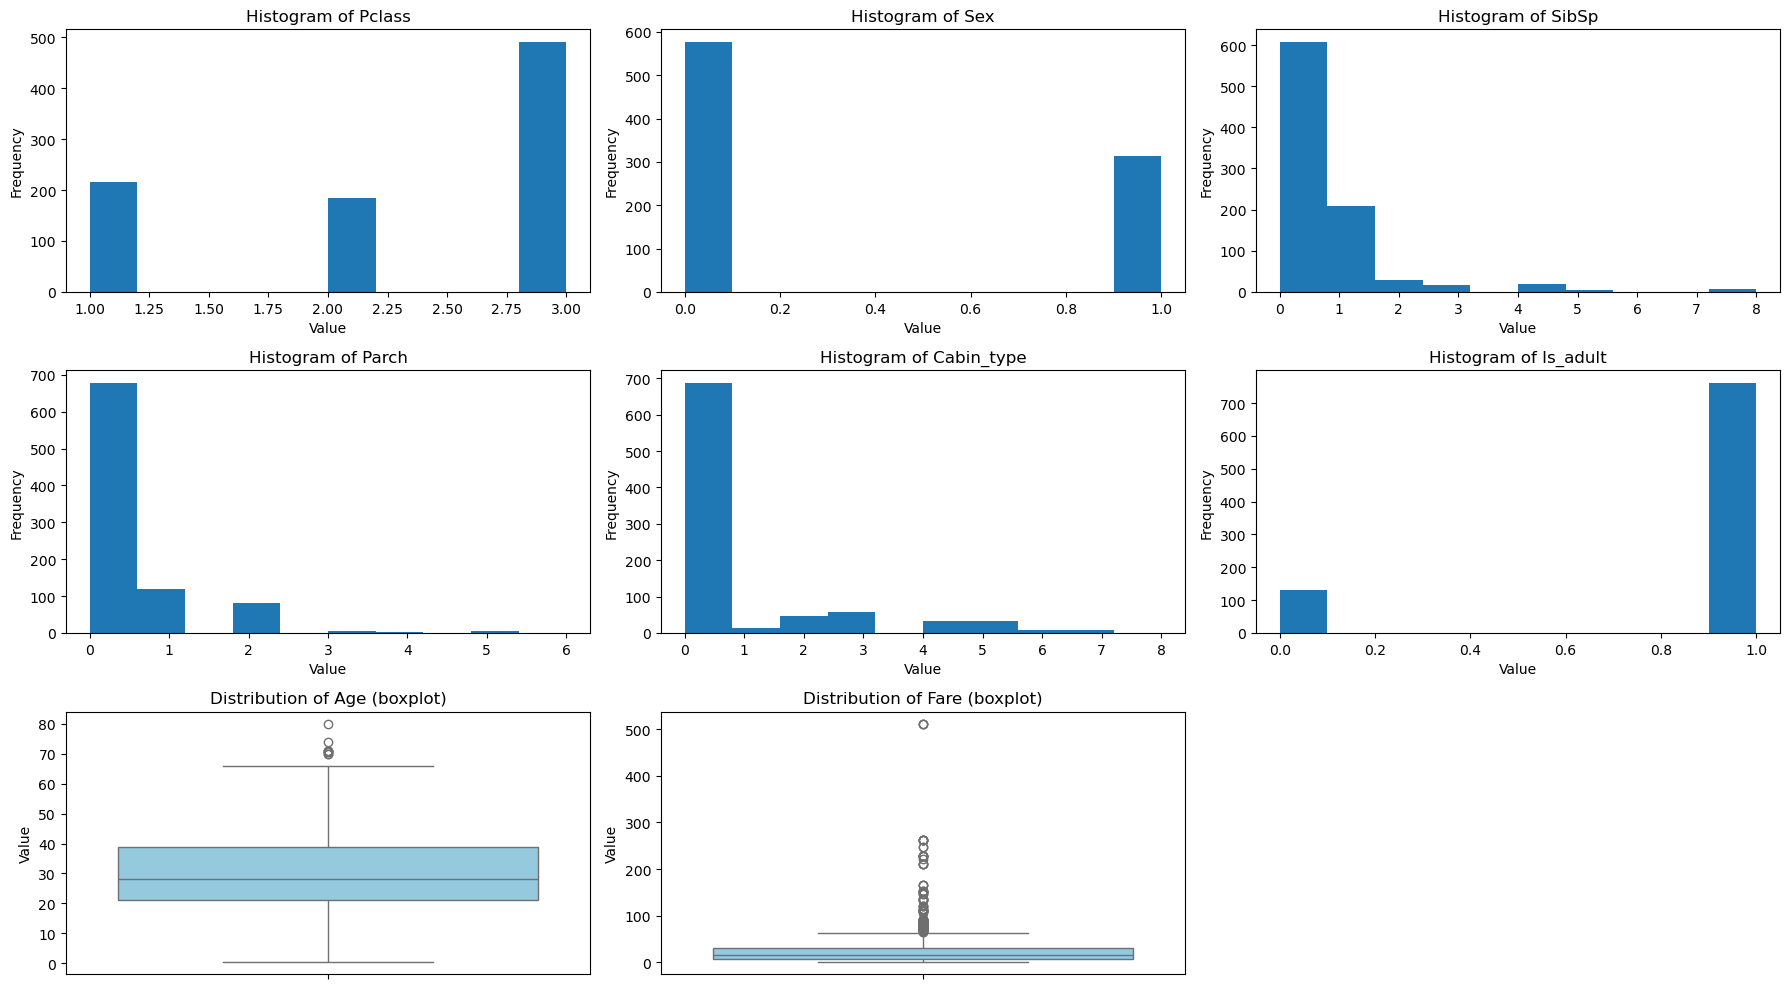

In [62]:
plt.figure(figsize=(18, 10))
counter = 1

for i in titanic_categ.columns:
    plt.subplot(3, 3, counter)
    nice_hist(titanic_categ, i)
    counter += 1

plt.subplot(3, 3, 7)
nice_box(titanic_df, 'Age')
plt.subplot(3, 3, 8)
nice_box(titanic_df, 'Fare')

plt.tight_layout()
plt.show()

Ze wzglƒôdu na niewielkƒÖ ilo≈õƒá klas dla zmiennych jako≈õciowych(a raczej ilo≈õciowych dyskretnych traktowanych jako jako≈õciowe) postanowi≈Çam u≈ºyƒá histogram√≥w. Dla zmiennych ilo≈õciowych ciƒÖg≈Çych u≈ºy≈Çam wykres√≥w pude≈Çkowych. Z powy≈ºszych wykres√≥w mo≈ºna wysnuƒá nastƒôpujƒÖce wnioski:

* Jedynymi zmiennymi, kt√≥re nie cechujƒÖ siƒô ≈ºadnymi warto≈õciami odstajƒÖcymi, sƒÖ *Pclass*, *Sex* i *Is_adult*. Zmienne te posiadajƒÖ niewiele warto≈õci, przez co ciƒô≈ºko o odstawanie o og√≥≈Çu.
* Zar√≥wno *Parch* jak i *Cabin_type* cechujƒÖ siƒô ogromnƒÖ ilo≈õciƒÖ wystƒôpowa≈Ñ warto≈õci 0, przez co pozosta≈Çe warto≈õci mo≈ºna uznaƒá za odstajƒÖce. Podobnie sytuacja ma siƒô dla *SibSp*, jednak tym razem do wiƒôkszo≈õci mo≈ºna r√≥wnie≈º zaliczyƒá warto≈õƒá 1.
* Poniewa≈º kolumny *Age* i *Fare* sƒÖ jedynymi zmiennymi typu liczbowego ciƒÖg≈Çego, widoczny jest znaczƒÖcy wzrost obserwacji odstajƒÖcych. G≈Ç√≥wnie dotyczy to *Age*, gdzie jako odstajƒÖce traktowane sƒÖ warto≈õci ju≈º powy≈ºej $\frac{1}{5}$ maksymalnej warto≈õci.

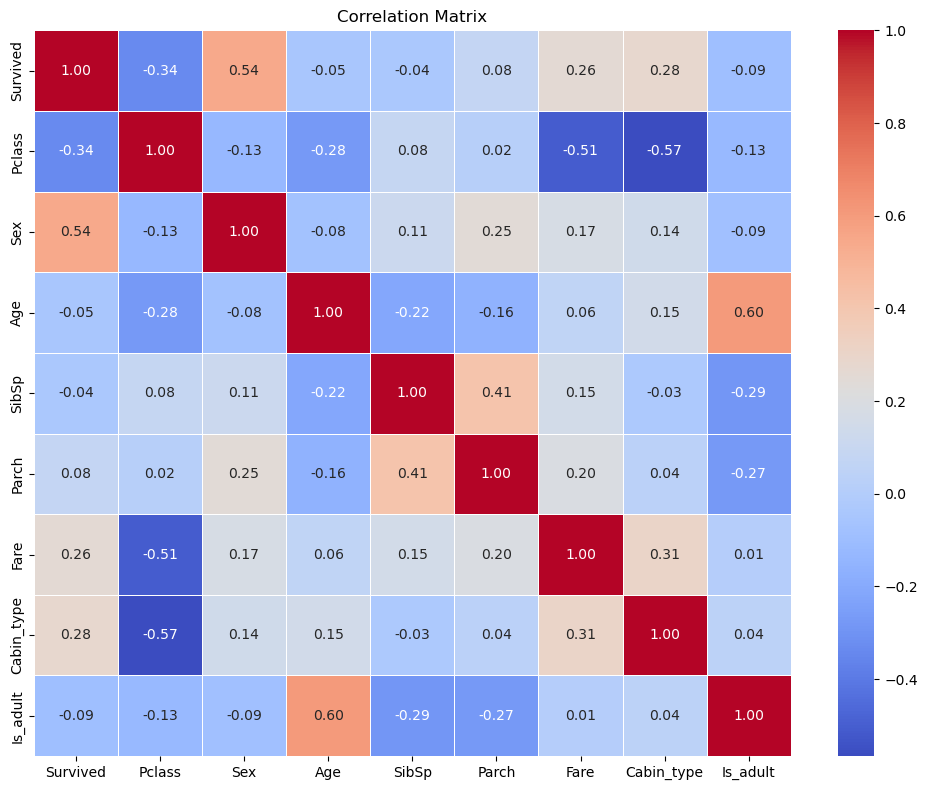

In [63]:
def plot_correlation_matrix(df):
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
plot_correlation_matrix(titanic_df)

Dziƒôki heatmapie mo≈ºemy przyjrzeƒá siƒô korelacji miƒôdzy poszczeg√≥lnymi zmiennymi:

* Z oczywistych wzglƒôd√≥w najwy≈ºszƒÖ dodatniƒÖ korelacje ma cecha *Age* z pochodnƒÖ jej *Is_adult*.
* Co ciekawe kolejnƒÖ najwy≈ºszƒÖ dodatniƒÖ korelacjƒô ma zmienna *Sex* ze zmiennƒÖ predykowanƒÖ *Survived* - sugeruje to potrzebƒô skupienia siƒô na bardziej szczeg√≥≈Çowej wizualizacji dla tej pary, gdy≈º mo≈ºe to prowadziƒá do pewnych trend√≥w w prze≈ºywalno≈õci.
* Nastƒôpny, wciƒÖ≈º stosunkowo wysoki wynik, osiƒÖga *Parch* z *SibSp*. Nie istnieje jednak wiƒôksza korelacja ze zmiennƒÖ *Survived*. Mo≈ºe to sugerowaƒá, i≈º pasa≈ºerowie, kt√≥rzy decydowali siƒô podr√≥≈ºowaƒá z ma≈Ç≈ºonkiem/rodze≈Ñstwem, decydowali siƒô zabieraƒá ze sobƒÖ pe≈Çen sk≈Çad swoich rodzin (dzieci/rodzic√≥w).
* Zmienne *Cabin_type* *Fare* i *Survived* wykazujƒÖ zauwa≈ºalnƒÖ korelacjƒô miƒôdzy sobƒÖ. Mo≈ºe wynikaƒá to z tego, i≈º wyb√≥r typu kabiny zale≈ºa≈Ç w du≈ºej mierze od standardu jaki on zapewnia≈Ç, a co za tym idzie, cenƒÖ jakƒÖ trzeba by≈Ço za niego zap≈Çaciƒá. Okazuje siƒô jednak, ≈ºe za kosztami nie sz≈Çy wy≈ÇƒÖcznie luksusy, gdy≈º mia≈Ço to pewien wp≈Çyw na wsp√≥≈Çczynnik prze≈ºycia.
* OstatniƒÖ dodatniƒÖ korelacjƒÖ godnƒÖ uwagi okazuje siƒô ta pomiedzy *Parch*, a *Sex*. Mo≈ºe to wynikaƒá z tego, i≈º jedna p≈Çeƒá by≈Ça bardziej sk≈Çonna do zabierania ze sobƒÖ m≈Çodszych bƒÖd≈∫ starszych cz≈Çonk√≥w rodziny.
* Warto r√≥wnie≈º zwr√≥ciƒá uwagƒô na wysokie ujemne korelacje - jednƒÖ z nich jest ta pomiƒôdzy *Pclass*, a *Survived*. Dziƒôki temu mo≈ºemy siƒô domy≈õlaƒá, ≈ºe niestety klasa, kt√≥rƒÖ siƒô podr√≥≈ºowa≈Ço, mia≈Ça spory wp≈Çyw na wsp√≥≈Çczynnik prze≈ºywalno≈õci.
* KolejnƒÖ zmiennƒÖ o wysoce ujemnych korelacjach jest sama kolumna *Pclass*. Ma ona powiƒÖzania z *Age*, *Fare* i *Cabin_type*, co mo≈ºe wynikaƒá z tego, i≈º osoby w r√≥≈ºnym wieku mia≈Çy r√≥≈ºne zasoby pieniƒô≈ºne, a co za tym idzie, by≈Ço je staƒá lub nie na zakup biletu w wy≈ºszej klasie.
* R√≥wnie≈º oczywistym powiƒÖzaniem jest to miƒôdzy zmiennƒÖ *Is_adult*, a *SibSp* i *Parch* - dzieci z regu≈Çy podr√≥≈ºowa≈Çy z rodzicami oraz rodze≈Ñstwem.

### Zale≈ºno≈õci dla poszczeg√≥lnych zmiennych

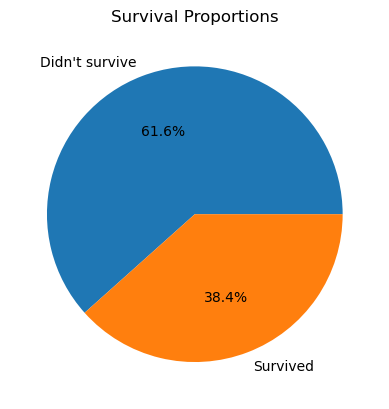

In [90]:
proportions = titanic_df['Survived'].value_counts()
label = ["Didn't survive", "Survived"]
plt.pie(x = proportions, labels = label, autopct = '%1.1f%%')
plt.title('Survival Proportions')
plt.show() 

Na wstƒôpie chcia≈Çam podkre≈õliƒá oryginalnƒÖ warto≈õƒá wsp√≥≈Çczynnika prze≈ºywalno≈õci. Nieca≈Çe 40% za≈Çogi statku prze≈ºy≈Ço, co oznacza, ≈ºe tylko warto≈õci znacznie wy≈ºsze lub ni≈ºsze od tego procentu bƒôdƒÖ mia≈Çy potencja≈Ç na bycie zalƒÖ≈ºkiem pewnego trendu.

#### 1. *Pclass*

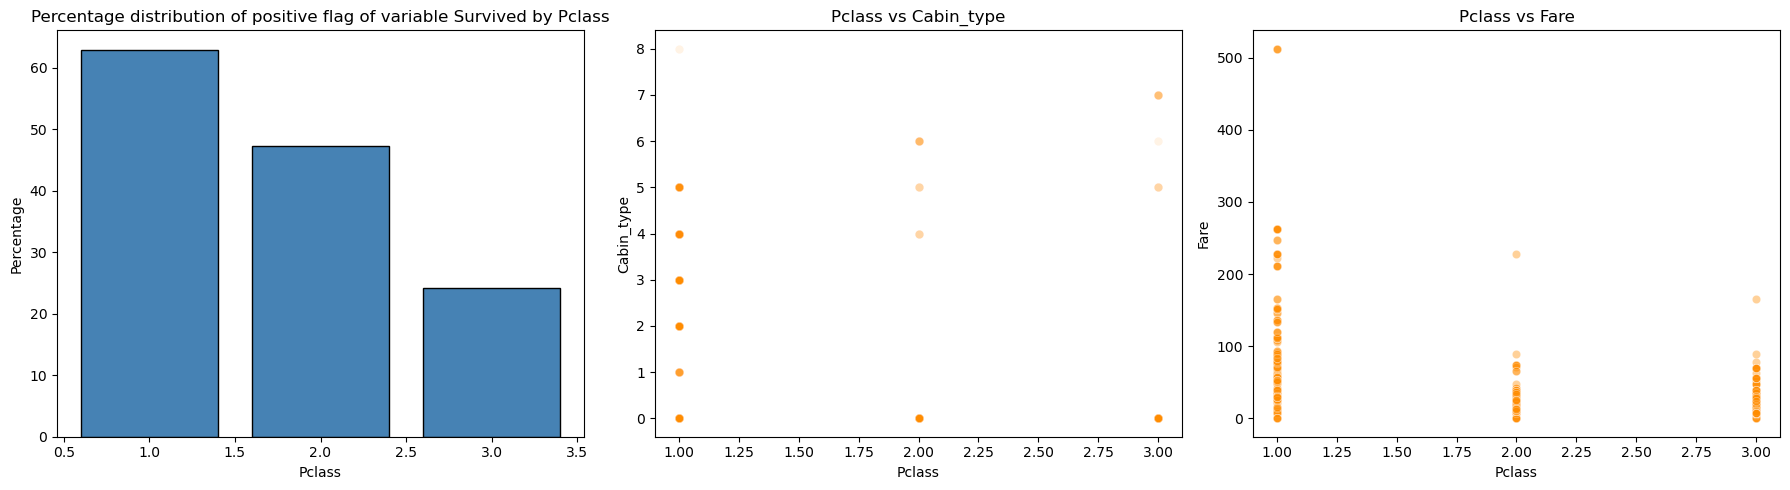

In [106]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
nice_percentage_plot(titanic_df, 'Pclass', 'Survived')
plt.subplot(1, 3, 2)
nice_scatter(titanic_df, 'Pclass', 'Cabin_type', "dd")
plt.subplot(1, 3, 3)
nice_scatter(titanic_df, 'Pclass', 'Fare', "cd")
plt.tight_layout()
plt.show()

Na pierwszym wykresie zdaje siƒô utworzyƒá zauwa≈ºalny trend. Niestety wychodzi na to, ≈ºe im wy≈ºsza klasa, kt√≥rƒÖ podr√≥≈ºowa≈Ça dana osoba, tym wy≈ºsze prawdopodobie≈Ñstwo na jej przetrwanie. PatrzƒÖc na to, ≈ºe wsp√≥≈Çczynnik przetrwania trzeciej, najliczniejszej klasy wynosi zaledwie oko≈Ço 25%, zostawia to czytelnika z bardzo przykrƒÖ refleksjƒÖ.

KontynuujƒÖc analizƒô, wykresy rozrzutu potwierdzajƒÖ hipotezƒô istenienia korelacji miƒôdzy *Pclass*, a *Cabin_type* i *Fare*. Mo≈ºemy najprawdopodobniej za≈Ço≈ºyƒá, ≈ºe im mniejsza litera alfabetu(A = 1, B = 2, itd. na wykresie), tym by≈Ç wy≈ºszy standard kabiny. Niestety w danych wystƒôpowa≈Ço wiele brakujƒÖcych warto≈õci, przez co nie jeste≈õmy w stanie upewniƒá siƒô co do s≈Çuszno≈õci. W przypadku *Fare* jest to do≈õƒá oczywista zale≈ºno≈õƒá - im wy≈ºsza klasa, tym wiƒôcej os√≥b o wy≈ºszej cenie biletu. Da siƒô jednak odnale≈∫ƒá wyra≈∫ne obserwacje odstajƒÖce.

#### 2. *Sex*

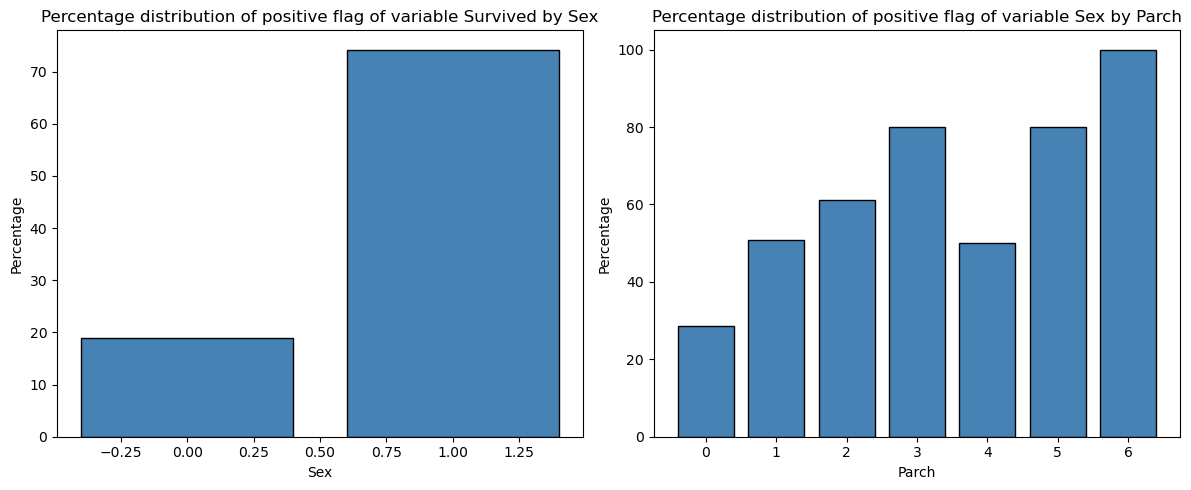

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
nice_percentage_plot(titanic_df, 'Sex', 'Survived')
plt.subplot(1, 2, 2)
nice_percentage_plot(titanic_df, 'Parch', 'Sex')
plt.tight_layout()
plt.show()

Tym razem r√≥wnie≈º mo≈ºemy zauwa≈ºyƒá trend w prze≈ºywalno≈õci. Okazuje siƒô, ≈ºe kobiety (warto≈õƒá *Sex* r√≥wna 1) stanowiƒÖce zaledwie $\frac{1}{3}$ za≈Çogi, mia≈Çy znacznie wy≈ºszƒÖ szansƒô na przetrwanie. Jest to o tyle ciekawe, ≈ºe patrzƒÖc na drugi wykres, kobiety o wiele czƒô≈õciej podr√≥≈ºowa≈Çy z rodzinƒÖ (co najmniej jednym lub wiƒôcej dzieckiem/rodzicem) ni≈º mƒô≈ºczy≈∫ni.

#### 3. *SibSp* i *Parch*

##### *SibSp*

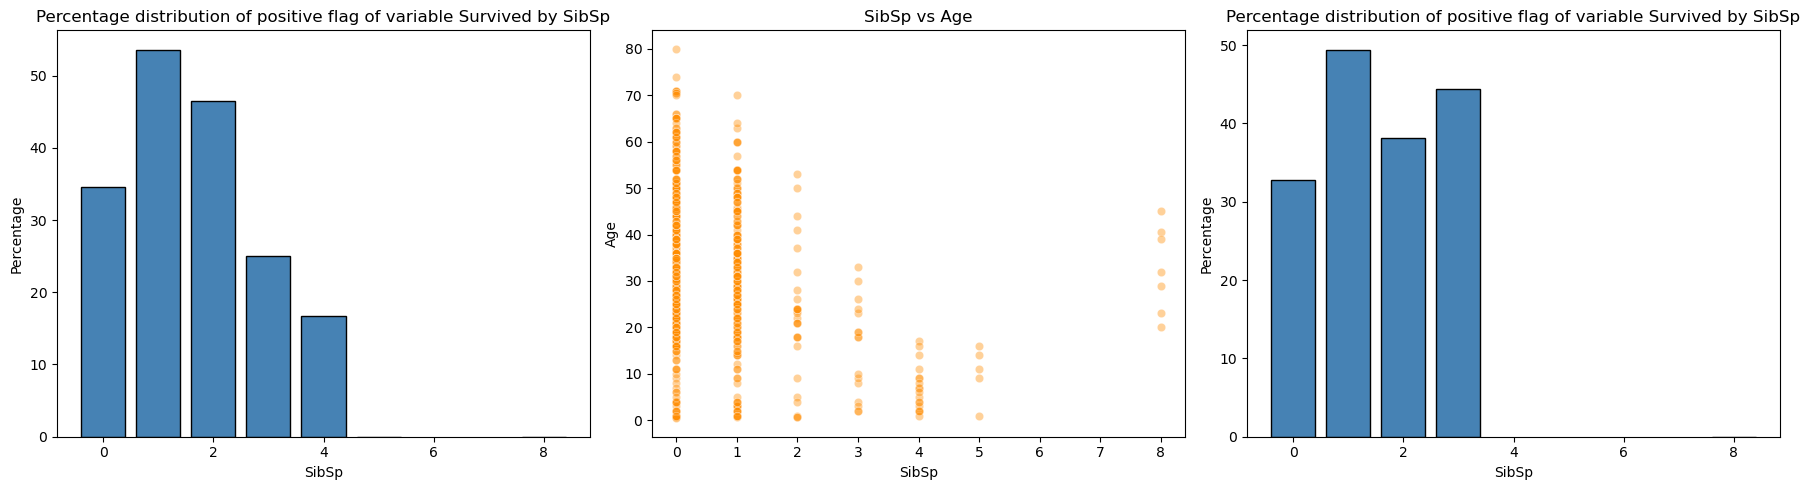

In [74]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
nice_percentage_plot(titanic_df, 'SibSp', 'Survived')
plt.subplot(1, 3, 2)
nice_scatter(titanic_df, 'SibSp', 'Age', "cd")
plt.subplot(1, 3, 3)
nice_percentage_plot(titanic_df[titanic_df['Is_adult'] == 1], 'SibSp', 'Survived')
plt.tight_layout()
plt.show()

Z wykresu rozk≈Çadu pokazanego w poprzednim rozdziale pamiƒôtamy, ≈ºe cechowa≈Ç siƒô on prawostronnƒÖ sko≈õno≈õciƒÖ, a co za tym idzie - wysokƒÖ liczbƒÖ os√≥b bez ≈ºadnego, lub tylko z jednym, rodze≈Ñstwem/ma≈Ç≈ºonkiem. Potwierdza to r√≥wnie≈º wykres rozrzutu wy≈ºej - dla wiƒôkszej warto≈õci zmiennej *SibSp* mo≈ºna go≈Çym okiem zidentyfikowaƒá rodziny (raczej chodzi o rodze≈Ñstwo ma≈Çych dzieci, co zdaje siƒô potwierdzaƒá trzeci wykres).

Niestety zgodnie z oczekiwaniami, nie jest zauwa≈ºalny ≈ºaden pewny trend. Ze wzglƒôdu na wy≈ºszy wsp√≥≈Çczynnik prze≈ºywalno≈õci dla os√≥b z jednym bƒÖd≈∫ dwoma rodze≈Ñstwem/ma≈Ç≈ºonkami mo≈ºemy spekulowaƒá, ≈ºe osobom o ma≈Çej liczbie os√≥b do opieki by≈Ço ≈Çatwiej prze≈ºyƒá.

##### *Parch*

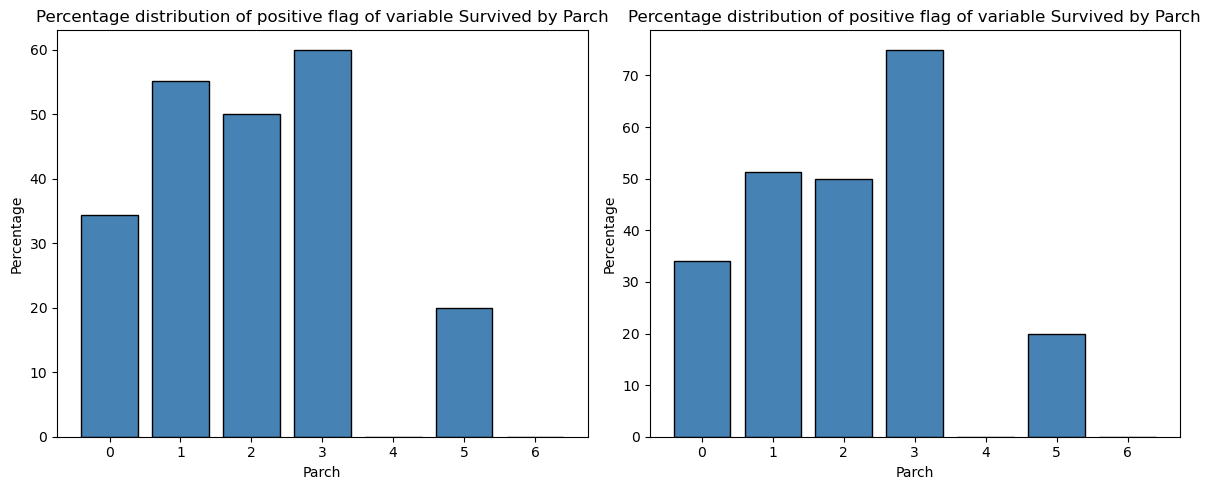

In [92]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
nice_percentage_plot(titanic_df, 'Parch', 'Survived')
plt.subplot(1, 2, 2)
nice_percentage_plot(titanic_df[titanic_df['Is_adult'] == 1], 'Parch', 'Survived')
plt.tight_layout()
plt.show()

Mimo ≈ºe dzieci(czƒô≈õƒá os√≥b z Parch r√≥wnym 1 lub 2) jest stosunkowo niewiele, da siƒô zauwa≈ºyƒá wyra≈∫ny spadek w prze≈ºywalno≈õci w≈õr√≥d samych doros≈Çych(wykres z prawej) w por√≥wnaniu do wszystkich os√≥b(wykres z lewej). PatrzƒÖc na og√≥lne warto≈õci mogliby≈õmy spekulowaƒá, ≈ºe im wiƒôcej dana osoba mia≈Ça cz≈Çonk√≥w rodziny do uratowania, tym bardziej by≈Ça sk≈Çonna do prze≈ºycia PatrzƒÖc jednak na og√≥lny rozk≈Çad warto≈õci *Parch*, wszystkie warto≈õci poza 0 stanowiƒÖ wyjƒÖtki, co czyni ten trend ma≈Ço stosownym.

##### *SibSp* vs *Parch*

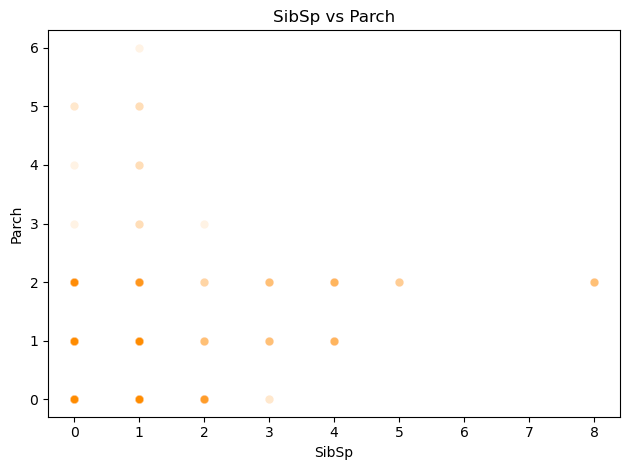

In [66]:
nice_scatter(titanic_categ, 'SibSp', 'Parch', "dd")
plt.tight_layout()
plt.show()

Ze wzglƒôdu na to, ≈ºe *SibSp* i *Parch* wykaza≈Çy na macierzy zauwa≈ºalnƒÖ korelacjƒô miƒôdzy sobƒÖ, postanowi≈Çam por√≥wnaƒá te dwie zmienne ze sobƒÖ za pomocƒÖ scatter plota. Moje wcze≈õniejsze hipotezy odno≈õnie zabierania najbli≈ºszych rodzin zdajƒÖ siƒô potwierdzaƒá - jest wiele os√≥b kt√≥re majƒÖ do dw√≥ch rodzic√≥w/dzieci oraz do jednego ma≈Ç≈ºonka/rodze≈Ñstwa.